# CLASSIFICATION

# In this notebook we will understand how classification works using scikit learn on the famous MINST data set.




In [68]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_openml
minst  = fetch_openml('mnist_784',version=1)
minst.keys()

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

# Describing MINST Data

In [71]:
minst['DESCR']
X , y = minst["data"] , minst["target"]
X.shape
print(y[0])
y = y.astype(np.uint8) ##converting Y to a number format

5


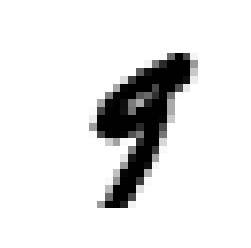

In [72]:


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [73]:
X_train , X_test , y_train , y_test = X[:60000],X[60000:],y[:60000],y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)

X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]


# Training a binary classifier

In [74]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5 )


from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


## predicting using SGD classifier
sgd_clf.predict([some_digit])

/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([False])

# Implementing Cross Validation


In [75]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index , test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9679


/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.93445


/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9556


In [76]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameter

array([0.9679 , 0.93445, 0.9556 ])

# Model Analysis 

In [77]:
## Naive Bayes model for comparison

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X , y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    


In [78]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9105 , 0.9067 , 0.91175])

In [81]:
## CONFUSION MATRIX
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)


/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/deepanshu.kandpal/anaconda3/envs/JIOML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameter

array([[52559,  2020],
       [  821,  4600]])

# Confusion matrix , precision , recall 

In [82]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [86]:
''' precision  = TP/TP+FP
    recall = TP/TP+FN
    F1 score = harmonic mean of precision and recall
    F1 =      2 
        -------------
         1    +    1
       ------     ----
     precision   recall
''' 

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))


from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.6948640483383686
0.8485519276886183


0.7640561415164854

# Precision Recall Trade off

In [89]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-177264.39527054])